<i>Note, run</i> `conda install beautifulsoup4` <i>in Anaconda prompt before doing this lab. Alternatively, upload this to ArcGIS Online and run in ArcGIS Notebooks.</i>

# APIs & Web Scraping
Tons of web data useful for social scientists and humanists

* social media
* news media
* government publications
* organizational records

Two kinds of ways to get data off the web
* Webscraping - i.e. user-facing websites for humans
* APIs - i.e. application-facing, for computers

## What is an API?
* Application Programming Interface
* set of rules and procedures that facilitate interactions between computers and their applications
* allows users to query a remote database over the internet
* take on a variety of formats
* majority adhere to a particular style known as Representational State Transfer or REST
* "RESTful" APIs are convenient because we can use them to query databases using URLs

### HTML
HTTP (Hypertext Transfer Protocol) is one of the main ways computers communicate with each other on the Internet.

<u>Client-server computing model</u>: servers provide a service or resource, and clients request that service. Computers running browsers are examples of a client, while a host in the cloud running is an example of a server.

<u>Request-response protocol</u>: a client sends a request to a server, then receives a response

### requests library

The two most common types of HTTP requests are `GET` and `POST`

* `GET` - request data from the server
* `POST` - submit data to the server

Both types get a response, which can be formatted in HTML or other formats including JSON (similar to Python dictionaries).

#### Making a request

In [4]:
import requests

url = 'https://en.wikipedia.org/wiki/Request–response'
# Make the request and store the response
r = requests.get(url)

# Get the result
r.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Request–response - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9fa55c1f-09a8-4791-87b9-95e15f00ce29","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Request–response","wgTitle":"Request–response","wgCurRevisionId":1111967471,"wgRevisionId":1111967471,"wgArticleId":10175634,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Network protocols"],"wgPageContentLanguage":"en","wgPage

In [5]:
# Also, check the status code to make sure it downloaded successfully (200 is what we want)
r.status_code

200

In [6]:

# set base url
base_url="https://itunes.apple.com/search"

search_params = {"term":"The Beatles", # All these search parameter names can be found on the Applie itunes API page (just google search for it!) 
                 "media": "music",
                 "entity": "album",
                 "attribute": "artistTerm"}  
# make request
r = requests.get(base_url, params=search_params)

print(r.url)

https://itunes.apple.com/search?term=The+Beatles&media=music&entity=album&attribute=artistTerm


In [7]:
# Inspect the content of the response, parsing the result as text
response_text= r.text
response_text

'\n\n\n{\n "resultCount":45,\n "results": [\n{"wrapperType":"collection", "collectionType":"Album", "artistId":136975, "collectionId":1440833098, "amgArtistId":3644, "artistName":"The Beatles", "collectionName":"1", "collectionCensoredName":"1", "artistViewUrl":"https://music.apple.com/us/artist/the-beatles/136975?uo=4", "collectionViewUrl":"https://music.apple.com/us/album/1/1440833098?uo=4", "artworkUrl60":"https://is5-ssl.mzstatic.com/image/thumb/Music116/v4/f2/98/fb/f298fb48-1e0e-6ad4-4cff-fb824b77f02e/15UMGIM59587.rgb.jpg/60x60bb.jpg", "artworkUrl100":"https://is5-ssl.mzstatic.com/image/thumb/Music116/v4/f2/98/fb/f298fb48-1e0e-6ad4-4cff-fb824b77f02e/15UMGIM59587.rgb.jpg/100x100bb.jpg", "collectionPrice":12.99, "collectionExplicitness":"notExplicit", "trackCount":27, "copyright":"This Compilation ℗ 2015 Calderstone Productions Limited (a division of Universal Music Group) / Apple Corps Ltd.", "country":"USA", "currency":"USD", "releaseDate":"2000-11-13T08:00:00Z", "primaryGenreName

In [8]:
import json
data = json.loads(response_text)
data

{'resultCount': 45,
 'results': [{'wrapperType': 'collection',
   'collectionType': 'Album',
   'artistId': 136975,
   'collectionId': 1440833098,
   'amgArtistId': 3644,
   'artistName': 'The Beatles',
   'collectionName': '1',
   'collectionCensoredName': '1',
   'artistViewUrl': 'https://music.apple.com/us/artist/the-beatles/136975?uo=4',
   'collectionViewUrl': 'https://music.apple.com/us/album/1/1440833098?uo=4',
   'artworkUrl60': 'https://is5-ssl.mzstatic.com/image/thumb/Music116/v4/f2/98/fb/f298fb48-1e0e-6ad4-4cff-fb824b77f02e/15UMGIM59587.rgb.jpg/60x60bb.jpg',
   'artworkUrl100': 'https://is5-ssl.mzstatic.com/image/thumb/Music116/v4/f2/98/fb/f298fb48-1e0e-6ad4-4cff-fb824b77f02e/15UMGIM59587.rgb.jpg/100x100bb.jpg',
   'collectionPrice': 12.99,
   'collectionExplicitness': 'notExplicit',
   'trackCount': 27,
   'copyright': 'This Compilation ℗ 2015 Calderstone Productions Limited (a division of Universal Music Group) / Apple Corps Ltd.',
   'country': 'USA',
   'currency': 'USD'

In [9]:
data.keys()

dict_keys(['resultCount', 'results'])

In [10]:
data['resultCount']

45

In [11]:
# Get first result
data['results'][0]

{'wrapperType': 'collection',
 'collectionType': 'Album',
 'artistId': 136975,
 'collectionId': 1440833098,
 'amgArtistId': 3644,
 'artistName': 'The Beatles',
 'collectionName': '1',
 'collectionCensoredName': '1',
 'artistViewUrl': 'https://music.apple.com/us/artist/the-beatles/136975?uo=4',
 'collectionViewUrl': 'https://music.apple.com/us/album/1/1440833098?uo=4',
 'artworkUrl60': 'https://is5-ssl.mzstatic.com/image/thumb/Music116/v4/f2/98/fb/f298fb48-1e0e-6ad4-4cff-fb824b77f02e/15UMGIM59587.rgb.jpg/60x60bb.jpg',
 'artworkUrl100': 'https://is5-ssl.mzstatic.com/image/thumb/Music116/v4/f2/98/fb/f298fb48-1e0e-6ad4-4cff-fb824b77f02e/15UMGIM59587.rgb.jpg/100x100bb.jpg',
 'collectionPrice': 12.99,
 'collectionExplicitness': 'notExplicit',
 'trackCount': 27,
 'copyright': 'This Compilation ℗ 2015 Calderstone Productions Limited (a division of Universal Music Group) / Apple Corps Ltd.',
 'country': 'USA',
 'currency': 'USD',
 'releaseDate': '2000-11-13T08:00:00Z',
 'primaryGenreName': 'Roc

In [12]:
# Process all the results
import pandas as pd
beatles_df = pd.DataFrame(data['results']) # To get the full table first
beatles_df = beatles_df[['artistName', 'collectionName', # Now we're only keeping certain columns from the full table got in last step!
                         'collectionPrice', 'trackCount',
                         'releaseDate']].sort_values(by="releaseDate")
beatles_df


,artistName,collectionName,collectionPrice,trackCount,releaseDate
12,The Beatles,Please Please Me,12.99,16,1963-03-22T08:00:00Z
18,The Beatles,With The Beatles,12.99,16,1963-11-22T08:00:00Z
11,The Beatles,A Hard Day's Night,12.99,15,1964-07-10T07:00:00Z
22,The Beatles,Beatles For Sale,12.99,16,1964-12-04T08:00:00Z
10,The Beatles,Help!,12.99,16,1965-08-06T07:00:00Z
6,The Beatles,Rubber Soul,12.99,16,1965-12-03T08:00:00Z
32,The Beatles,Revolver,12.99,16,1966-08-05T07:00:00Z
29,The Beatles,Sgt. Pepper's Lonely Hearts Club Band,12.99,15,1967-05-26T07:00:00Z
39,The Beatles,Sgt. Pepper's Lonely Hearts Club Band (Super D...,49.99,65,1967-05-26T07:00:00Z
17,The Beatles,Sgt. Pepper's Lonely Hearts Club Band (Deluxe ...,19.99,32,1967-06-01T07:00:00Z


## Why Webscrape?

Benefits:
* Pretty much any content that can be viewed on a webpage can be scraped. (https://epps.utdallas.edu/about/faculty/)
* No API needed
* No rate-limiting or authentication (usually)  

Challenges:
* Rarely tailored for researchers
* Messy, unstructured, inconsistent
* Entirely site-dependent

Webscraping vs. APIs rule of thumb:
* Check for API first. If the API is not available, scrape.*
* If the site allows you to do so, scrape.
* Wikipedia and IMDB both allow scraping, so those are easy sites to start with.

### HTML
HyperText Markup Language (HTML) is a language that most webpages are written in.

It is made up of tags like so:
```html
    <html>
        <head>
        </head>
        <body>
        </body>
    </html>
```

Other tags include:

* `<div>` - general division or area of the page
* `<b>` - bolds text
* `<i>` - italicizes text
* `<table>` - denotes a table on the page
* `<form>` - form for input

### The tools
1. [Requests](http://docs.python-requests.org/en/latest/user/quickstart/)
2. [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [13]:
#! conda install beautifulsoup4

In [14]:
# import required modules
import requests
from bs4 import BeautifulSoup

### Step 1 - Make a GET request and read response HTML

In [15]:
# make a GET request
req = requests.get('https://house.texas.gov/members/')
# read the content of the server’s response
src = req.text

### Step 2 - Soup It
Now we use the `BeautifulSoup` function to parse the reponse into an HTML tree. This returns an object (called a soup object) which contains all of the HTML in the original document.

In [16]:
# parse the response into an HTML tree
soup = BeautifulSoup(src)
# take a look
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <title>
   Texas House of Representatives : House Members
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="Texas House of Representatives" name="author"/>
  <meta content="Texas House of Representatives, legislature, legislation, house, senate, bills, bill" name="keywords"/>
  <meta content="Website for the Texas House of Representatives.  Provides information on legislation, committees, Texas house, and session." name="description"/>
  <meta content="Legislation, State governments, Legislative Branch of Government, Bills" name="subject"/>
  <meta content="3f73f901329e0c55-4773827067868245-gdb26772d529ada4b-11" name="google-translate-customization"/>
  <meta content="Texas House of Representatives" property="og:title"/>
  <meta content="summary" property="og:type"/>
  <meta content="https://www.house.texas.gov" property="og:url"/>
  <meta content="https://www.house.texas.gov/_images/twitter/

### Step 3 - Find elements
BeautifulSoup has a number of functions to find things on a page. Like other webscraping tools, Beautiful Soup lets you find elements by their:

HTML tags
HTML Attributes
CSS Selectors
Let's search first for <b>HTML tags</b>.

The function `find_all` searches the soup tree to find all the elements with an a particular HTML tag, and returns all of those elements.

What does the example below do?

In [17]:
# find all elements in a certain tag
soup.find_all("a") #a gives only the HTMLs on the page!

[<a href="#navigation">Skip to navigation</a>,
 <a href="#wrapper">Skip to the main content</a>,
 <a href="https://www.house.texas.gov/">
 <img alt="Texas House of Representatives" id="logo" src="/_images/nav-logo-small-new.png"/></a>,
 <a href="http://www.house.texas.gov/"><img alt="Texas House of Representatives" src="/_images/title.png" title="Texas House of Representatives"/><span>Texas House of Representatives</span></a>,
 <a class="about-us" href="/about-us/">About</a>,
 <a class="members" href="/members/">Members</a>,
 <a href="/members/speaker">Speaker</a>,
 <a href="/members/find-your-representative/">Find Your Rep.</a>,
 <a class="committees" href="/committees/">Committees</a>,
 <a class="news" href="/news/">News</a>,
 <a class="research" href="/research/">Research</a>,
 <a class="resources" href="/resources/">Resources</a>,
 <a class="schedules" href="/schedules/">Schedules</a>,
 <a class="video-audio" href="/video-audio/">Video/Audio</a>,
 <a href="/video-audio/">Live Broad

That's a lot! Many elements on a page will have the same html tag. For instance, if you search for everything with the a tag, you're likely to get a lot of stuff, much of which you don't want. What if we wanted to search for HTML tags ONLY with certain attributes, like particular CSS classes?

We can do this by adding an additional argument to the `find_all`

In the example below, we are finding all the a tags, and then filtering those with class = "sidemenu".

In [18]:
# Get only the 'a' tags in 'sidemenu' class
soup("a", class_="member-img") # We found this class name by inspecting the code of the web page of Texas members (link above)

[<a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="../photos/members/2100.jpg?v=01"/><br/><strong>Rep. Allen, Alma A.</strong></a>,
 <a class="member-img" href="/members/member-page/?district=121"><img alt="House Member" class="no-img" src="../photos/members/3800.jpg?v=01"/><br/><strong>Rep. Allison, Steve</strong></a>,
 <a class="member-img" href="/members/member-page/?district=103"><img alt="House Member" class="no-img" src="../photos/members/2150.jpg?v=01"/><br/><strong>Rep. Anchía, Rafael</strong></a>,
 <a class="member-img" href="/members/member-page/?district=56"><img alt="House Member" class="no-img" src="../photos/members/2155.jpg?v=01"/><br/><strong>Rep. Anderson, Charles "Doc"</strong></a>,
 <a class="member-img" href="/members/member-page/?district=57"><img alt="House Member" class="no-img" src="../photos/members/2330.jpg?v=01"/><br/><strong>Rep. Ashby, Trent</strong></a>,
 <a class="member-img" href="/members/member-

In [19]:
# Alternatively can get the same results using CSS-style notation:
soup.select("a.member-img")

[<a class="member-img" href="/members/member-page/?district=131"><img alt="House Member" class="no-img" src="../photos/members/2100.jpg?v=01"/><br/><strong>Rep. Allen, Alma A.</strong></a>,
 <a class="member-img" href="/members/member-page/?district=121"><img alt="House Member" class="no-img" src="../photos/members/3800.jpg?v=01"/><br/><strong>Rep. Allison, Steve</strong></a>,
 <a class="member-img" href="/members/member-page/?district=103"><img alt="House Member" class="no-img" src="../photos/members/2150.jpg?v=01"/><br/><strong>Rep. Anchía, Rafael</strong></a>,
 <a class="member-img" href="/members/member-page/?district=56"><img alt="House Member" class="no-img" src="../photos/members/2155.jpg?v=01"/><br/><strong>Rep. Anderson, Charles "Doc"</strong></a>,
 <a class="member-img" href="/members/member-page/?district=57"><img alt="House Member" class="no-img" src="../photos/members/2330.jpg?v=01"/><br/><strong>Rep. Ashby, Trent</strong></a>,
 <a class="member-img" href="/members/member-

However, looking at the results, it seems that the District number is missing. Instead we need to search for the parent element. Using Chrome Dev-Tools, we can see that the parent element is a td (table column element) with a class of `members-img-center`.

In [20]:
# Get all the representative elements
reps = soup.select('td.members-img-center')


In [21]:
# For each of those member entities get their info
districts = [int(d.find(text=True, recursive=False).replace('District\xa0', '')) for d in reps] # Recursive=False means get all the text that's not a child, i.e. grab all the top-level text only in this class
names = [r.find(class_='member-img').get_text() for r in reps]


pd.DataFrame({"name":names, "district":districts}).sort_values(by="district")

,name,district
141,"Rep. VanDeaver, Gary",1
125,"Rep. Slaton, Bryan",2
7,"Rep. Bell, Cecil",3
8,"Rep. Bell, Keith",4
53,"Rep. Hefner, Cole",5
...,...,...
134,"Rep. Thierry, Shawn",146
67,"Rep. Jones, Jolanda",147
94,"Rep. Morales Shaw, Penny",148
143,"Rep. Vo, Hubert",149


# Homework
## Undergrads

Use the [REST Countries API](https://restcountries.com/) to get a list of all the countries that have Spanish (language code="spa") as an official language. Print the name and population of each country in a nice-looking table.

In [22]:
# set base url
base_url="https://restcountries.com/v2/lang/es"

search_params = {"languages":"spa"}

# Make the request and store the response
rest = requests.get(base_url, params=search_params)

print(rest.url)

# Get the result
rest.text

https://restcountries.com/v2/lang/es?languages=spa


'[{"name":"Argentina","topLevelDomain":[".ar"],"alpha2Code":"AR","alpha3Code":"ARG","callingCodes":["54"],"capital":"Buenos Aires","altSpellings":["AR","Argentine Republic","República Argentina"],"subregion":"South America","region":"Americas","population":45376763,"latlng":[-34.0,-64.0],"demonym":"Argentinean","area":2780400.0,"gini":42.9,"timezones":["UTC-03:00"],"borders":["BOL","BRA","CHL","PRY","URY"],"nativeName":"Argentina","numericCode":"032","flags":{"svg":"https://flagcdn.com/ar.svg","png":"https://flagcdn.com/w320/ar.png"},"currencies":[{"code":"ARS","name":"Argentine peso","symbol":"$"}],"languages":[{"iso639_1":"es","iso639_2":"spa","name":"Spanish","nativeName":"Español"},{"iso639_1":"gn","iso639_2":"grn","name":"Guaraní","nativeName":"Avañe\'ẽ"}],"translations":{"br":"Arc\'hantina","pt":"Argentina","nl":"Argentinië","hr":"Argentina","fa":"آرژانتین","de":"Argentinien","es":"Argentina","fr":"Argentine","ja":"アルゼンチン","it":"Argentina","hu":"Argentína"},"flag":"https://flagcd

In [23]:
# Inspect the content of the response, parsing the result as text
response_text= rest.text
response_text

'[{"name":"Argentina","topLevelDomain":[".ar"],"alpha2Code":"AR","alpha3Code":"ARG","callingCodes":["54"],"capital":"Buenos Aires","altSpellings":["AR","Argentine Republic","República Argentina"],"subregion":"South America","region":"Americas","population":45376763,"latlng":[-34.0,-64.0],"demonym":"Argentinean","area":2780400.0,"gini":42.9,"timezones":["UTC-03:00"],"borders":["BOL","BRA","CHL","PRY","URY"],"nativeName":"Argentina","numericCode":"032","flags":{"svg":"https://flagcdn.com/ar.svg","png":"https://flagcdn.com/w320/ar.png"},"currencies":[{"code":"ARS","name":"Argentine peso","symbol":"$"}],"languages":[{"iso639_1":"es","iso639_2":"spa","name":"Spanish","nativeName":"Español"},{"iso639_1":"gn","iso639_2":"grn","name":"Guaraní","nativeName":"Avañe\'ẽ"}],"translations":{"br":"Arc\'hantina","pt":"Argentina","nl":"Argentinië","hr":"Argentina","fa":"آرژانتین","de":"Argentinien","es":"Argentina","fr":"Argentine","ja":"アルゼンチン","it":"Argentina","hu":"Argentína"},"flag":"https://flagcd

In [24]:
import json
data = json.loads(response_text)
data

[{'name': 'Argentina',
  'topLevelDomain': ['.ar'],
  'alpha2Code': 'AR',
  'alpha3Code': 'ARG',
  'callingCodes': ['54'],
  'capital': 'Buenos Aires',
  'altSpellings': ['AR', 'Argentine Republic', 'República Argentina'],
  'subregion': 'South America',
  'region': 'Americas',
  'population': 45376763,
  'latlng': [-34.0, -64.0],
  'demonym': 'Argentinean',
  'area': 2780400.0,
  'gini': 42.9,
  'timezones': ['UTC-03:00'],
  'borders': ['BOL', 'BRA', 'CHL', 'PRY', 'URY'],
  'nativeName': 'Argentina',
  'numericCode': '032',
  'flags': {'svg': 'https://flagcdn.com/ar.svg',
   'png': 'https://flagcdn.com/w320/ar.png'},
  'currencies': [{'code': 'ARS', 'name': 'Argentine peso', 'symbol': '$'}],
  'languages': [{'iso639_1': 'es',
    'iso639_2': 'spa',
    'name': 'Spanish',
    'nativeName': 'Español'},
   {'iso639_1': 'gn',
    'iso639_2': 'grn',
    'name': 'Guaraní',
    'nativeName': "Avañe'ẽ"}],
  'translations': {'br': "Arc'hantina",
   'pt': 'Argentina',
   'nl': 'Argentinië',
   

In [25]:
data[0].keys()

dict_keys(['name', 'topLevelDomain', 'alpha2Code', 'alpha3Code', 'callingCodes', 'capital', 'altSpellings', 'subregion', 'region', 'population', 'latlng', 'demonym', 'area', 'gini', 'timezones', 'borders', 'nativeName', 'numericCode', 'flags', 'currencies', 'languages', 'translations', 'flag', 'regionalBlocs', 'cioc', 'independent'])

In [26]:
df = pd.DataFrame(data, columns=['name','population'])

In [27]:
print(df)

                                  name  population
0                            Argentina    45376763
1                               Belize      397621
2     Bolivia (Plurinational State of)    11673029
3                                Chile    19116209
4                             Colombia    50882884
5                           Costa Rica     5094114
6                                 Cuba    11326616
7                   Dominican Republic    10847904
8                              Ecuador    17643060
9                          El Salvador     6486201
10                   Equatorial Guinea     1402985
11                                Guam      168783
12                           Guatemala    16858333
13                            Honduras     9904608
14                              Mexico   128932753
15                           Nicaragua     6624554
16                              Panama     4314768
17                            Paraguay     7132530
18                             

Use BeautifulSoup to scrape the [Texas Senate membership webpage](https://senate.texas.gov/directory.php) to get a list of the Texas State Senators.

## Grads

Use the [REST Countries API](https://restcountries.com/) to get a list of all the countries that have Spanish (language code="spa") as an official language. Print the name and population of each country. Have the table sorted by population, from largest to smallest, and use comma separation number formatting for the population (e.g. 1,000,000).

In [28]:
df = pd.DataFrame(data, columns=['name','population']).sort_values(by="population", ascending=False)
df.loc[:, "population"] = df["population"].map('{:,d}'.format)
df

,name,population
14,Mexico,"128,932,753"
4,Colombia,"50,882,884"
20,Spain,"47,351,567"
0,Argentina,"45,376,763"
18,Peru,"32,971,846"
22,Venezuela (Bolivarian Republic of),"28,435,943"
3,Chile,"19,116,209"
8,Ecuador,"17,643,060"
12,Guatemala,"16,858,333"
2,Bolivia (Plurinational State of),"11,673,029"


Use BeautifulSoup to scrape the [Texas Senate membership webpage](https://senate.texas.gov/directory.php) to get a list of the Texas State Senator information. Create a list of Python dictionaries containing each Senator's name, district, and party

In [29]:
# import required modules
import requests
from bs4 import BeautifulSoup

In [30]:
# make a GET request
req = requests.get('https://senate.texas.gov/directory.php')
# read the content of the server’s response
src = req.text

In [31]:
# parse the response into an HTML tree
soup = BeautifulSoup(src)
# take a look
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" id="viewportjs" name="viewport"/>
  <title>
   The Texas State Senate – Membership Directory
  </title>
  <meta content="The Texas State Senate – Membership Directory" property="og:title"/>
  <meta content="https://senate.texas.gov/_assets/img/og_image.jpg" property="og:image"/>
  <link href="_assets/img/favicon.ico" rel="shortcut icon"/>
  <link href="_assets/img/favicon.png" rel="icon"/>
  <!--[if lt IE 9]>
	<script src="_assets/js/html5shiv.min.js"></script>
    <link type="text/css" href="_assets/css/ie7.css" rel="stylesheet">
<![endif]-->
  <link href="_assets/css/jquery-ui.min.css" rel="stylesheet" type="text/css"/>
  <link href="_assets/css/jquery-ui.structure.min.css" rel="stylesheet" type="text/css"/>
  <link href="_assets/css/jquery-ui.theme.min.css" rel="stylesheet" type="text/css"/>
  <link href="_assets/img/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57


In [32]:
soup.find_all("a")

[<a href="?lang=en">ENGLISH</a>,
 <a href="?lang=es">ESPAÑOL</a>,
 <a href="index.php"><img alt="Seal of the Senate of the State of Texas" class="senseal" src="_assets/img/header_senseal_24.png"/></a>,
 <a href="index.php"><img alt="Seal of the Senate of the State of Texas" class="sensealmobile" src="_assets/img/header_senseal_24.png"/></a>,
 <a href="ltgov.php">Lt. Governor</a>,
 <a href="members.php">Senators</a>,
 <a href="sos.php">Secretary</a>,
 <a href="committees.php">Committees</a>,
 <a href="av-live.php">News &amp; Media</a>,
 <a href="vcenter.php">Visitors</a>,
 <a href="kids.php">For Kids</a>,
 <a href="ltgov.php"><img alt="Lt. Governor" id="nav_01_en.png" src="_assets/img/nav_01_en.png"/></a>,
 <a class="nav_sub_a" href="members.php">Members</a>,
 <a class="nav_sub_a" href="directory.php">Full Directory</a>,
 <a class="nav_sub_a" href="facts.php">Facts &amp; Figures</a>,
 <a class="nav_sub_a" href="seniority.php">Seniority</a>,
 <a class="nav_sub_a" href="https://wrm.capito

In [33]:
# Get only the 'a' tags in 'sidemenu' class
soup("td", class_="md_sdp")

[<td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=1"><span class="prtbld">Bryan Hughes</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>01</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=2"><span class="prtbld">Bob Hall</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>02</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=3"><span class="prtbld">Robert Nichols</span></a></div>
 <div class="md_lin"><span clas

In [34]:
# Get only the 'a' tags in 'sidemenu' class
soup("span", class_="prtbld")

[<span class="prtbld">Bryan Hughes</span>,
 <span class="prtbld">Bob Hall</span>,
 <span class="prtbld">Robert Nichols</span>,
 <span class="prtbld">Brandon Creighton</span>,
 <span class="prtbld">Charles Schwertner</span>,
 <span class="prtbld">Carol Alvarado</span>,
 <span class="prtbld">Paul Bettencourt</span>,
 <span class="prtbld">Angela Paxton</span>,
 <span class="prtbld">Kelly Hancock</span>,
 <span class="prtbld">Beverly Powell</span>,
 <span class="prtbld">Larry Taylor</span>,
 <span class="prtbld">Jane Nelson</span>,
 <span class="prtbld">Borris L. Miles</span>,
 <span class="prtbld">Sarah Eckhardt</span>,
 <span class="prtbld">John Whitmire</span>,
 <span class="prtbld">Nathan Johnson</span>,
 <span class="prtbld">Joan Huffman</span>,
 <span class="prtbld">Lois W. Kolkhorst</span>,
 <span class="prtbld">Roland Gutierrez</span>,
 <span class="prtbld">Juan "Chuy" Hinojosa</span>,
 <span class="prtbld">Judith Zaffirini</span>,
 <span class="prtbld">Brian Birdwell</span>,
 <spa

In [35]:
# Get only the 'a' tags in 'sidemenu' class
reps = soup("td", class_="md_sdp")
reps

[<td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=1"><span class="prtbld">Bryan Hughes</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>01</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=2"><span class="prtbld">Bob Hall</span></a></div>
 <div class="md_lin"><span class="monosp">District: <span class="prtspc">      </span></span>02</div>
 <div><span class="monosp">Party:   <span class="prtspc">       </span></span>Republican</div>
 </td>,
 <td class="md_sdp" colspan="2">
 <div><span class="monosp">Senator: <span class="prtspc">       </span></span><a href="member.php?d=3"><span class="prtbld">Robert Nichols</span></a></div>
 <div class="md_lin"><span clas

In [36]:
party = [r.get_text() for r in reps]
party

['\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Bryan Hughes\nDistrict: \xa0\xa0\xa0\xa0\xa0\xa001\nParty: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Republican\n',
 '\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Bob Hall\nDistrict: \xa0\xa0\xa0\xa0\xa0\xa002\nParty: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Republican\n',
 '\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Robert Nichols\nDistrict: \xa0\xa0\xa0\xa0\xa0\xa003\nParty: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Republican\n',
 '\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Brandon Creighton\nDistrict: \xa0\xa0\xa0\xa0\xa0\xa004\nParty: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Republican\n',
 '\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Charles Schwertner\nDistrict: \xa0\xa0\xa0\xa0\xa0\xa005\nParty: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Republican\n',
 '\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Carol Alvarado\nDistrict: \xa0\xa0\xa0\xa0\xa0\xa006\nParty: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Democrat\n',
 '\nSenator: \xa0\xa0\xa0\xa0\xa0\xa0\xa0Paul Bettencourt\nDistrict: \xa0\xa0\xa0\xa0

In [37]:
# For each of those member entities get their info
# districts = [int(d.find(text=True, recursive=False).replace('District\xa0', '')) for d in reps]
party = [r.get_text()[r.get_text().find('Party: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0'):-1].replace('Party: \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0','') for r in reps]
party

['Republican',
 'Republican',
 'Republican',
 'Republican',
 'Republican',
 'Democrat',
 'Republican',
 'Republican',
 'Republican',
 'Democrat',
 'Republican',
 'Republican',
 'Democrat',
 'Democrat',
 'Democrat',
 'Democrat',
 'Republican',
 'Republican',
 'Democrat',
 'Democrat',
 'Democrat',
 'Republican',
 'Democrat',
 'Republican',
 'Republican',
 'Democrat',
 'Democrat',
 'Republican',
 'Democrat',
 'Republican',
 'Republican']

In [38]:
# For each of those member entities get their info
# districts = [int(d.find(text=True, recursive=False).replace('District\xa0', '')) for d in reps]
names = [r.find(class_='prtbld').get_text() for r in reps]


In [39]:
names

['Bryan Hughes',
 'Bob Hall',
 'Robert Nichols',
 'Brandon Creighton',
 'Charles Schwertner',
 'Carol Alvarado',
 'Paul Bettencourt',
 'Angela Paxton',
 'Kelly Hancock',
 'Beverly Powell',
 'Larry Taylor',
 'Jane Nelson',
 'Borris L. Miles',
 'Sarah Eckhardt',
 'John Whitmire',
 'Nathan Johnson',
 'Joan Huffman',
 'Lois W. Kolkhorst',
 'Roland Gutierrez',
 'Juan "Chuy" Hinojosa',
 'Judith Zaffirini',
 'Brian Birdwell',
 'Royce West',
 'Dawn Buckingham',
 'Donna Campbell',
 'José Menéndez',
 'Eduardo A. (Eddie) Lucio, Jr.',
 'Charles Perry',
 'César Blanco',
 'Drew Springer',
 'Kel Seliger']

In [40]:
districts = [r.find(class_='md_lin').get_text()[-2:] for r in reps]

In [41]:
districts

['01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

In [47]:
df1=pd.DataFrame({"name":names, "district":districts, "party":party}).sort_values(by="district")
df1


,name,district,party
0,Bryan Hughes,01,Republican
1,Bob Hall,02,Republican
2,Robert Nichols,03,Republican
3,Brandon Creighton,04,Republican
4,Charles Schwertner,05,Republican
5,Carol Alvarado,06,Democrat
6,Paul Bettencourt,07,Republican
7,Angela Paxton,08,Republican
8,Kelly Hancock,09,Republican
9,Beverly Powell,10,Democrat


Convert this list of dictionaries to a pandas DataFrame and save it to a .CSV file.

In [55]:
df1.to_csv('file1.csv', index=False)

In [56]:
#Checking csv file
new_df = pd.read_csv('file1.csv')
 
print(new_df)

                             name  district       party
0                    Bryan Hughes         1  Republican
1                        Bob Hall         2  Republican
2                  Robert Nichols         3  Republican
3               Brandon Creighton         4  Republican
4              Charles Schwertner         5  Republican
5                  Carol Alvarado         6    Democrat
6                Paul Bettencourt         7  Republican
7                   Angela Paxton         8  Republican
8                   Kelly Hancock         9  Republican
9                  Beverly Powell        10    Democrat
10                   Larry Taylor        11  Republican
11                    Jane Nelson        12  Republican
12                Borris L. Miles        13    Democrat
13                 Sarah Eckhardt        14    Democrat
14                  John Whitmire        15    Democrat
15                 Nathan Johnson        16    Democrat
16                   Joan Huffman        17  Rep

In [58]:
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 50)
%matplotlib inline

Use pandas to create a pie chart of Senate membership by party ([Hint](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html))

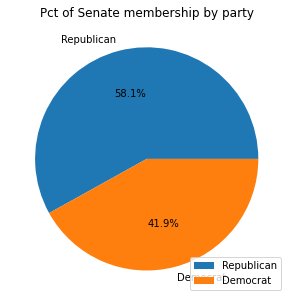

In [62]:
# count the number of Senators by party
party_counts = df1.party.value_counts()
# plot the counts 
plt.figure(figsize=(5, 5))
# Set up equal axis for pie charts
plt.axis("equal")
# Create a pie plot using values, index as labels, and display labels to one decimal point
plt.pie(party_counts.values, labels=party_counts.index, autopct="%1.1f%%")
# Add a legend to the lower right
plt.legend(loc='lower right')
# Add title and show
plt.title("Pct of Senate membership by party")
plt.show()